In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap


data1 = pd.read_csv('CS_ACP_CC.csv',encoding='big5')

In [3]:
data1.rename(columns={"ID":"Type","ysiT":"Concentration"},inplace=True)

In [4]:
##Testing set 
dataR1_V = pd.read_csv('Val_R1_CC.csv',encoding='big5')
dataR1_V.rename(columns={"ID":"Type","ysiP":"Concentration"},inplace=True)
dataR2_V=pd.read_csv('Val_R2_CC.csv',encoding='big5')
dataR2_V.rename(columns={"info_1":"Type","glucose":"Concentration"},inplace=True)


In [5]:
###remove the unuseful features from validation data set
dataR1_V = dataR1_V.drop(['info_1'], axis=1)
dataR2_V = dataR2_V.drop(['ID'], axis=1)

print(dataR1_V.shape)
print(dataR2_V.shape)


(356, 27)
(32, 27)


In [6]:
###combine two types of testing set(R1 and R2)
dataR1R2_V=pd.concat([dataR1_V,dataR2_V],axis=0,ignore_index=True)
print(dataR1R2_V.sample(5))
print(dataR1R2_V.shape)

          Type  Concentration  Wavelength_1  Wavelength_2  Wavelength_3  \
198  Cowley_R1         115.50     -0.053145     -0.045284     -0.032768   
102  Cowley_R1          93.50     -0.054424     -0.046178     -0.032439   
321  Cowley_R1         171.00     -0.073220     -0.060475     -0.039717   
361  Cowley_R2         137.75     -0.040754     -0.014414      0.006455   
146  Cowley_R1         235.00     -0.053645     -0.033835     -0.011454   

     Wavelength_4  Wavelength_5  Wavelength_6  Wavelength_7  Wavelength_8  \
198     -0.022652     -0.018035     -0.009349     -0.007920     -0.012841   
102     -0.021020     -0.015212     -0.005081     -0.003147     -0.009273   
321     -0.025434     -0.019521     -0.008049     -0.008009     -0.016969   
361      0.009017      0.007950      0.010433      0.007299     -0.004799   
146     -0.003091     -0.001909      0.004913      0.003038     -0.008282   

     ...  Wavelength_16  Wavelength_17  Wavelength_18  Wavelength_19  \
198  ...      

In [7]:
###from data set to filter R1
data_R1=data1[data1['Type']=='Cowley_R1']
data_R1 = data_R1.drop(['info_1'], axis=1)

print(data_R1.sample(5))
print(data_R1.shape)

           Type  Concentration  Wavelength_1  Wavelength_2  Wavelength_3  \
1094  Cowley_R1         146.25     -0.056047     -0.040054     -0.021480   
1178  Cowley_R1         126.50     -0.067961     -0.058000     -0.043132   
1104  Cowley_R1         120.00     -0.064437     -0.054285     -0.037836   
901   Cowley_R1         140.50     -0.046585     -0.022001     -0.002472   
1013  Cowley_R1         131.25     -0.062402     -0.052859     -0.038021   

      Wavelength_4  Wavelength_5  Wavelength_6  Wavelength_7  Wavelength_8  \
1094     -0.012394     -0.009737     -0.002663     -0.003819     -0.012469   
1178     -0.031029     -0.025032     -0.014595     -0.012290     -0.017452   
1104     -0.025732     -0.020317     -0.010460     -0.009843     -0.016526   
901       0.001028      0.000856      0.004038      0.002021     -0.008207   
1013     -0.026977     -0.022375     -0.013550     -0.012463     -0.017727   

      ...  Wavelength_16  Wavelength_17  Wavelength_18  Wavelength_19  \
1

In [8]:
###from data set to filter R2
data_R2=data1[data1['Type']=='Cowley_R2']
data_R2 = data_R2.drop(['info_1'], axis=1)
print(data_R2.sample(5))
print(data_R2.shape)

          Type  Concentration  Wavelength_1  Wavelength_2  Wavelength_3  \
920  Cowley_R2        119.000     -0.040793     -0.012801      0.007627   
879  Cowley_R2        127.250     -0.041983     -0.002155      0.026228   
832  Cowley_R2        101.750     -0.044297     -0.018035      0.002592   
938  Cowley_R2        129.750     -0.053520     -0.022108      0.002667   
809  Cowley_R2        100.675     -0.033615     -0.000311      0.024952   

     Wavelength_4  Wavelength_5  Wavelength_6  Wavelength_7  Wavelength_8  \
920      0.009725      0.008956      0.010731      0.006475     -0.006195   
879      0.027509      0.025515      0.026415      0.021764      0.004024   
832      0.006098      0.006037      0.008452      0.006202     -0.004276   
938      0.006833      0.006190      0.008686      0.006233     -0.005608   
809      0.026960      0.025558      0.026630      0.020899      0.004866   

     ...  Wavelength_16  Wavelength_17  Wavelength_18  Wavelength_19  \
920  ...      

In [8]:
###Training Set R1 R2 preparation
data_R1R2 = pd.concat([data_R1,data_R2],axis=0,ignore_index=True)
print(data_R1R2.shape)
print(data_R1R2.head())

(633, 27)
        Type  Concentration  Wavelength_1  Wavelength_2  Wavelength_3  \
0  Cowley_R1        103.750     -0.056831     -0.049039     -0.037110   
1  Cowley_R1        154.750     -0.057957     -0.048207     -0.033600   
2  Cowley_R1        135.000     -0.057198     -0.048950     -0.036654   
3  Cowley_R1         99.225     -0.053599     -0.046017     -0.035366   
4  Cowley_R1        133.500     -0.053437     -0.044549     -0.031282   

   Wavelength_4  Wavelength_5  Wavelength_6  Wavelength_7  Wavelength_8  ...  \
0     -0.027735     -0.023469     -0.015346     -0.013575     -0.017487  ...   
1     -0.023542     -0.020122     -0.012470     -0.011685     -0.016502  ...   
2     -0.027245     -0.023236     -0.014749     -0.012591     -0.016913  ...   
3     -0.026690     -0.022138     -0.013987     -0.012311     -0.016736  ...   
4     -0.021983     -0.018300     -0.010589     -0.010003     -0.015493  ...   

   Wavelength_16  Wavelength_17  Wavelength_18  Wavelength_19  Wavelen

In [9]:
from pandas_profiling import ProfileReport
profile1 = ProfileReport(data_R1R2, title='Traindata Profile Report', explorative=True)
profile1.to_file('EDA_data_R1R2')

Render HTML: 100%|██████████| 1/1 [00:20<00:00, 20.68s/it]
c:\Users\Gerry\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:262: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]


In [10]:
profile2 = ProfileReport(dataR1R2_V, title='Traindata Profile Report', explorative=True)
profile2.to_file('EDA_dataR1R2_V')

Render HTML: 100%|██████████| 1/1 [00:13<00:00, 13.18s/it]
c:\Users\Gerry\anaconda3\lib\site-packages\pandas_profiling\profile_report.py:262: UserWarning: Extension  not supported. For now we assume .html was intended. To remove this warning, please use .html or .json.
  warnings.warn(
Export report to file: 100%|██████████| 1/1 [00:00<00:00,  8.60it/s]


In [9]:
###Training Set R1 R2 preparation
#X and Y

X_data_R1R2_T = data_R1R2.drop(['Type','Concentration'], axis=1)
print(X_data_R1R2_T.shape)

Y_data_R1R2_T = data_R1R2['Type']
print(Y_data_R1R2_T .shape)
print(Y_data_R1R2_T [:5])

(633, 25)
(633,)
0    Cowley_R1
1    Cowley_R1
2    Cowley_R1
3    Cowley_R1
4    Cowley_R1
Name: Type, dtype: object


In [10]:
###Validation Set R1 R2 preparation
###X and Y
X_data_R1R2_V = dataR1R2_V.drop(['Type','Concentration'], axis=1)
print(X_data_R1R2_V.shape)

Y_data_R1R2_V = dataR1R2_V['Type']
print(Y_data_R1R2_V .shape)
print(Y_data_R1R2_V [:5])

(388, 25)
(388,)
0    Cowley_R1
1    Cowley_R1
2    Cowley_R1
3    Cowley_R1
4    Cowley_R1
Name: Type, dtype: object


In [83]:
Y_data_R1R2_V

0      Cowley_R1
1      Cowley_R1
2      Cowley_R1
3      Cowley_R1
4      Cowley_R1
         ...    
383    Cowley_R2
384    Cowley_R2
385    Cowley_R2
386    Cowley_R2
387    Cowley_R2
Name: Type, Length: 388, dtype: object

In [11]:
##老師建議直接做 因為有Testing set 所以不切了
####Data split

from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_data_R1R2_T, Y_data_R1R2_T, 
                                                test_size=0.25,
                                                random_state=1)

In [12]:
##check train data
print(Xtrain.shape)
print(ytrain.shape)
print(Xtest.shape)
print(ytest.shape)

(474, 25)
(474,)
(159, 25)
(159,)


In [12]:
####PCA
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_data_R1R2_T)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_data_R1R2_T)         # 4. Transform the data to two dimensions
print(X_2D.shape)


(633, 2)


        Type  Concentration  Wavelength_1  Wavelength_2  Wavelength_3  \
0  Cowley_R1        103.750     -0.056831     -0.049039     -0.037110   
1  Cowley_R1        154.750     -0.057957     -0.048207     -0.033600   
2  Cowley_R1        135.000     -0.057198     -0.048950     -0.036654   
3  Cowley_R1         99.225     -0.053599     -0.046017     -0.035366   
4  Cowley_R1        133.500     -0.053437     -0.044549     -0.031282   

   Wavelength_4  Wavelength_5  Wavelength_6  Wavelength_7  Wavelength_8  ...  \
0     -0.027735     -0.023469     -0.015346     -0.013575     -0.017487  ...   
1     -0.023542     -0.020122     -0.012470     -0.011685     -0.016502  ...   
2     -0.027245     -0.023236     -0.014749     -0.012591     -0.016913  ...   
3     -0.026690     -0.022138     -0.013987     -0.012311     -0.016736  ...   
4     -0.021983     -0.018300     -0.010589     -0.010003     -0.015493  ...   

   Wavelength_18  Wavelength_19  Wavelength_20  Wavelength_21  Wavelength_22  \


<AxesSubplot:xlabel='PC1', ylabel='PC2'>

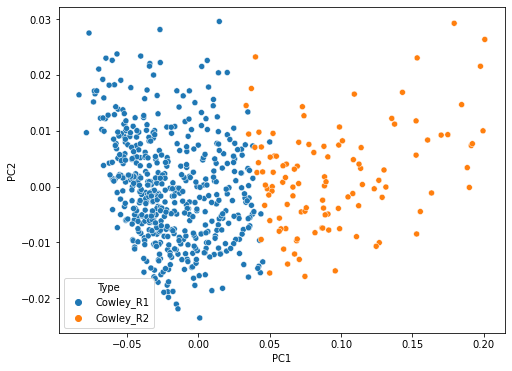

In [13]:
data_R1R2['PC1'] = X_2D[:, 0]
data_R1R2['PC2'] = X_2D[:, 1]
print(data_R1R2.head())

plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_R1R2, x='PC1', y='PC2', hue='Type')

0.9948453608247423


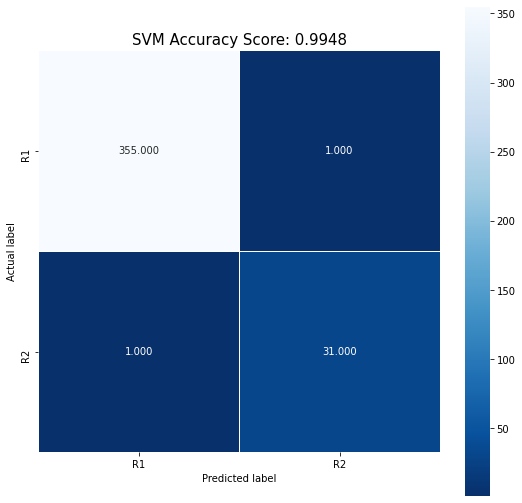

In [14]:
###The method_SVM

from sklearn.svm import SVC                    # 1. choose model class
model1 = SVC()                                 # 2. instantiate model
model1.fit(X_data_R1R2_T, Y_data_R1R2_T)                     # 3. fit model to data
y_model1 = model1.predict(X_data_R1R2_V)                # 4. Transform the data to two dimensions

from sklearn.metrics import accuracy_score
ass=round(accuracy_score(Y_data_R1R2_V, y_model1),4)
print(accuracy_score(Y_data_R1R2_V, y_model1))


##confusion_matrix

from sklearn import metrics
cm = metrics.confusion_matrix(Y_data_R1R2_V, y_model1)
# print(cm)

class_names = ['R1', 'R2']

fig, ax = plt.subplots(figsize=(9,9))

ax = sns.heatmap(cm, annot=True, 
                 fmt=".3f", 
                 linewidths=.5, 
                 square = True, 
                 cmap = 'Blues_r',
                 xticklabels=class_names, 
                 yticklabels=class_names);

ax.set_ylabel('Actual label');
ax.set_xlabel('Predicted label');
all_sample_title = f'SVM Accuracy Score: {ass}'
ax.set_title(all_sample_title, size = 15);
plt.show()


In [15]:
from sklearn.model_selection import GridSearchCV


param_grid_SVM = [{'kernel': ['rbf'], 'gamma': [1e-1,1, 1e-4],
                     'C': [1, 10, 100, 1000,10000,100000]},
                     {'kernel': ['linear'], 'C': [1, 10, 100, 1000,1000,100000]}]


search_SVM = GridSearchCV(model1, 
                      param_grid = param_grid_SVM,
                      cv = 5,
                      scoring = 'accuracy',##it's an indicator to evaluate the parameters##越大越好
                      n_jobs= 8,
                      )

search_SVM.fit(X_data_R1R2_T, Y_data_R1R2_T)


print(f'最好的參數 {search_SVM.best_params_}')####最好的參數
print(f'GridSearchCV 的 accuracy {search_SVM.best_score_}')####最好的accuracy

最好的參數 {'C': 100000, 'gamma': 1, 'kernel': 'rbf'}
GridSearchCV 的 accuracy 0.9937007874015749


GridSearch後 test data 的 accuracy 0.9922680412371134


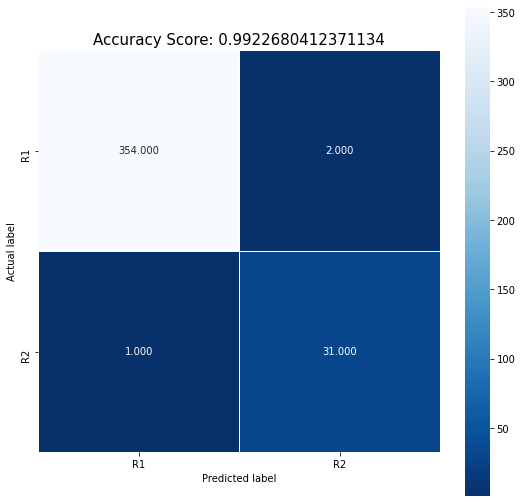

In [16]:
y_model1_1 = search_SVM.predict(X_data_R1R2_V)
ass1_1=accuracy_score(Y_data_R1R2_V, y_model1_1)
print(f'GridSearch後 test data 的 accuracy {accuracy_score(Y_data_R1R2_V, y_model1_1)}')

##confusion_matrix

from sklearn import metrics
cm1_1 = metrics.confusion_matrix(Y_data_R1R2_V, y_model1_1)
# print(cm)
class_names = ['R1', 'R2']

fig, ax = plt.subplots(figsize=(9,9))

ax = sns.heatmap(cm1_1, annot=True, 
                 fmt=".3f", 
                 linewidths=.5, 
                 square = True, 
                 cmap = 'Blues_r',
                 xticklabels=class_names, 
                 yticklabels=class_names);

ax.set_ylabel('Actual label');
ax.set_xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {ass1_1}'
ax.set_title(all_sample_title, size = 15);
plt.show()


[16:42:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
1.0
1.0


c:\Users\Gerry\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


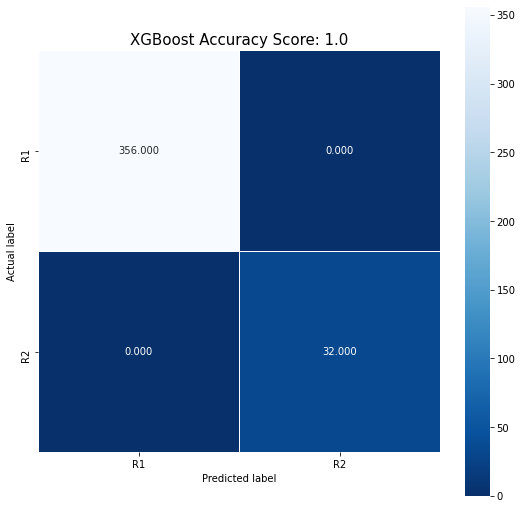

In [34]:
###The method_ XGBOOST

from xgboost import XGBClassifier               # 1. choose model class
model2 = XGBClassifier()                        # 2. instantiate model
model2.fit(X_data_R1R2_T, Y_data_R1R2_T)                      # 3. fit model to data
y_model2 = model2.predict(X_data_R1R2_V)                # 4. Transform the data to two dimensions


ass2=round(accuracy_score(Y_data_R1R2_V, y_model2),4)
print(accuracy_score(Y_data_R1R2_V, y_model2))

##double check
accuracy2={}
score2 = model2.score(X_data_R1R2_V, Y_data_R1R2_V)
print(score2)

accuracy2['xgboost accuracy']=(score2)


cm2= metrics.confusion_matrix(Y_data_R1R2_V, y_model2)
# print(cm)
class_names = ['R1', 'R2']
fig, ax = plt.subplots(figsize=(9,9))

ax = sns.heatmap(cm2, annot=True, ##改cm
                 fmt=".3f", 
                 linewidths=.5, 
                 square = True, 
                 cmap = 'Blues_r',
                 xticklabels=class_names, 
                 yticklabels=class_names);

ax.set_ylabel('Actual label');
ax.set_xlabel('Predicted label');
all_sample_title = f'XGBoost Accuracy Score: {ass2}'##改ass
ax.set_title(all_sample_title, size = 15);
plt.show()

0.9974226804123711
0.9974226804123711


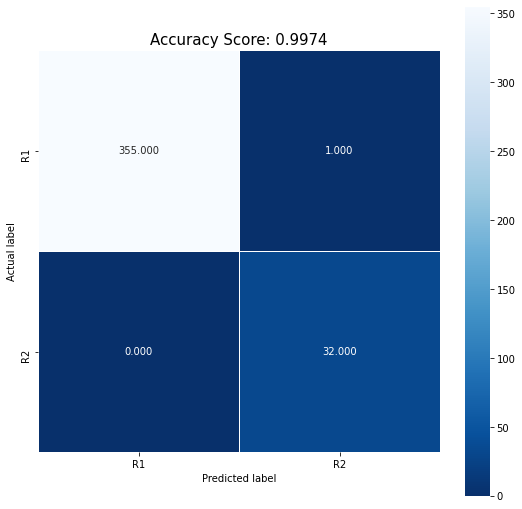

In [29]:
##method_ramdomforest
from sklearn import ensemble                                 # 1. choose model class
model3 = ensemble.RandomForestClassifier(n_estimators = 100) # 2. instantiate model
model3.fit(X_data_R1R2_T, Y_data_R1R2_T)                                  # 3. fit model to data
y_model3 = model3.predict(X_data_R1R2_V)                            # 4. Transform the data to two dimensions

ass3=round(accuracy_score(Y_data_R1R2_V, y_model3),4)
print(accuracy_score(Y_data_R1R2_V, y_model3))

##double check
accuracy3={}
score3 = model3.score(X_data_R1R2_V, Y_data_R1R2_V)
print(score3)

accuracy3['randomforest accuracy']=(score3)

cm3= metrics.confusion_matrix(Y_data_R1R2_V, y_model3)
# print(cm)
class_names = ['R1', 'R2']
fig, ax = plt.subplots(figsize=(9,9))

ax = sns.heatmap(cm3, annot=True, ##改cm
                 fmt=".3f", 
                 linewidths=.5, 
                 square = True, 
                 cmap = 'Blues_r',
                 xticklabels=class_names, 
                 yticklabels=class_names);

ax.set_ylabel('Actual label');
ax.set_xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {ass3}'##改ass
ax.set_title(all_sample_title, size = 15);
plt.show()

In [35]:

param_grid_RF = {'bootstrap': [True, False],                              # Method of selecting samples for training each tree
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],            # Maximum number of levels in tree
 'max_features': ['auto', 'sqrt'],                                        # Number of features to consider at every split
 'min_samples_leaf': [1, 2, 4],                                           # Minimum number of samples required at each leaf node
 'min_samples_split': [2, 5, 10],                                         # Minimum number of samples required to split a node
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}# Number of trees in random forest



search_RF = GridSearchCV(model3, 
                      param_grid = param_grid_RF,
                      cv = 5,
                      scoring = 'accuracy',##it's an indicator to evaluate the parameters##越大越好
                      n_jobs= 8,
                      )

search_RF.fit(X_data_R1R2_T, Y_data_R1R2_T)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=8,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100,
                                       None],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400,
                                          1600, 1800, 2000]},
             scoring='accuracy')

In [36]:
search_RF.best_params_####最好的參數
search_RF.best_score_####最好的accuracy

0.9874015748031496

1.0


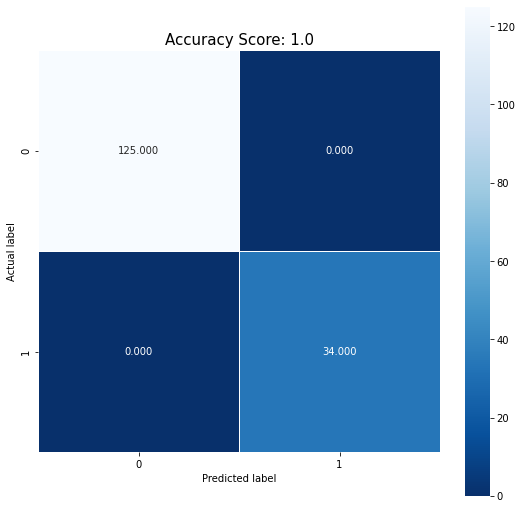

In [37]:
y_model3_1 = search_RF.predict(Xtest)
ass3_1=round(accuracy_score(ytest, y_model3_1),4)
print(accuracy_score(ytest, y_model3_1))
##confusion_matrix

from sklearn import metrics
cm3_1 = metrics.confusion_matrix(ytest, y_model3_1)
# print(cm)

fig, ax = plt.subplots(figsize=(9,9))

ax = sns.heatmap(cm3_1, annot=True, 
                 fmt=".3f", 
                 linewidths=.5, 
                 square = True, 
                 cmap = 'Blues_r');

ax.set_ylabel('Actual label');
ax.set_xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {ass3_1}'
ax.set_title(all_sample_title, size = 15);
plt.show()

0.9175257731958762


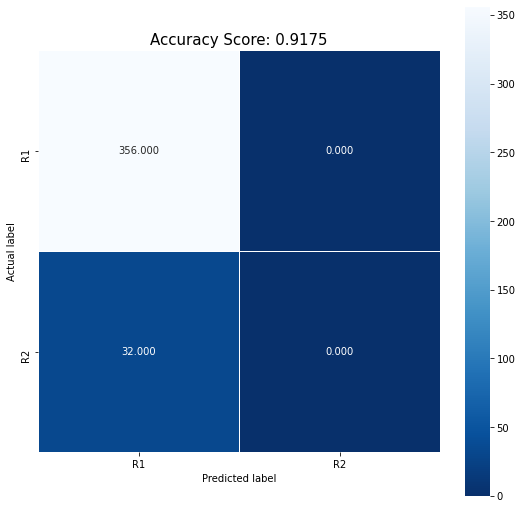

In [31]:
###method_logisticregression

from sklearn.linear_model import LogisticRegression
from sklearn import ensemble                    # 1. choose model class
model4 = LogisticRegression()                   # 2. instantiate model
model4.fit(X_data_R1R2_T, Y_data_R1R2_T)                      # 3. fit model to data
y_model4 = model4.predict(X_data_R1R2_V)                # 4. Transform the data to two dimensions

ass4=round(accuracy_score(Y_data_R1R2_V, y_model4),4)
print(accuracy_score(Y_data_R1R2_V, y_model4))

#confusion_matrix

from sklearn import metrics
cm4 = metrics.confusion_matrix(Y_data_R1R2_V, y_model4)
# print(cm)
class_names = ['R1', 'R2']
fig, ax = plt.subplots(figsize=(9,9))

ax = sns.heatmap(cm4, annot=True, 
                 fmt=".3f", 
                 linewidths=.5, 
                 square = True, 
                 cmap = 'Blues_r',
                 xticklabels=class_names, 
                 yticklabels=class_names);

ax.set_ylabel('Actual label');
ax.set_xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {ass4}'
ax.set_title(all_sample_title, size = 15);
plt.show()

In [20]:
param_grid_LR = {"penalty" : ['l1', 'l2'],          # l1 lasso l2 ridge
"C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
"solver" : ['liblinear', 'saga']}



search_LR = GridSearchCV(model4, 
                      param_grid = param_grid_LR,
                      cv = 5,
                      scoring = 'accuracy',##it's an indicator to evaluate the parameters##越大越好
                      n_jobs= 8,
                      )

search_LR.fit(X_data_R1R2_T, Y_data_R1R2_T)

print(f'最好的參數 {search_LR.best_params_}')####最好的參數
print(f'GridSearchCV 的 accuracy {search_LR.best_score_}')####最好的accuracy

最好的參數 {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 的 accuracy 0.9858267716535434


0.9974226804123711


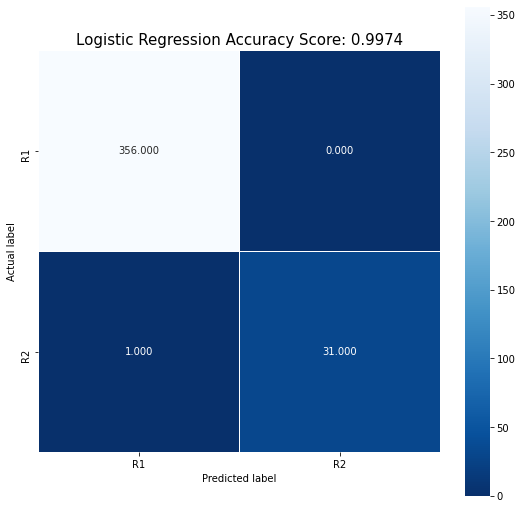

In [32]:
y_model4_1 = search_LR.predict(X_data_R1R2_V)
ass4_1=round(accuracy_score(Y_data_R1R2_V, y_model4_1),4)
print(accuracy_score(Y_data_R1R2_V, y_model4_1))

##confusion_matrix

from sklearn import metrics
cm4_1 = metrics.confusion_matrix(Y_data_R1R2_V, y_model4_1)
# print(cm)
class_names = ['R1', 'R2']
fig, ax = plt.subplots(figsize=(9,9))

ax = sns.heatmap(cm4_1, annot=True, 
                 fmt=".3f", 
                 linewidths=.5, 
                 square = True, 
                 cmap = 'Blues_r',
                 xticklabels=class_names, 
                 yticklabels=class_names);

ax.set_ylabel('Actual label');
ax.set_xlabel('Predicted label');
all_sample_title = f'Logistic Regression Accuracy Score: {ass4_1}'
ax.set_title(all_sample_title, size = 15);
plt.show()

0.9896907216494846


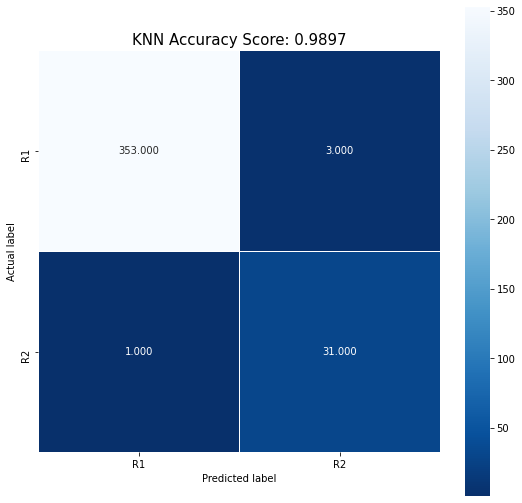

In [33]:
###method_KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn import ensemble                    # 1. choose model class
model5 = KNeighborsClassifier()                 # 2. instantiate model
model5.fit(X_data_R1R2_T, Y_data_R1R2_T)                      # 3. fit model to data
y_model5 = model5.predict(X_data_R1R2_V)                # 4. Transform the data to two dimensions

ass5=round(accuracy_score(Y_data_R1R2_V, y_model5),4)
print(accuracy_score(Y_data_R1R2_V, y_model5))

#confusion_matrix

from sklearn import metrics
cm5 = metrics.confusion_matrix(Y_data_R1R2_V, y_model5)
# print(cm)
class_names = ['R1', 'R2']
fig, ax = plt.subplots(figsize=(9,9))

ax = sns.heatmap(cm5, annot=True, 
                 fmt=".3f", 
                 linewidths=.5, 
                 square = True, 
                 cmap = 'Blues_r',
                 xticklabels=class_names, 
                 yticklabels=class_names);

ax.set_ylabel('Actual label');
ax.set_xlabel('Predicted label');
all_sample_title = f'KNN Accuracy Score: {ass5}'
ax.set_title(all_sample_title, size = 15);
plt.show()

In [23]:

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]

param_grid_knn = dict(n_neighbors = k_range, weights = weight_options)



search_knn = GridSearchCV(model5, 
                      param_grid = param_grid_knn,
                      cv = 5,
                      scoring = 'accuracy',##it's an indicator to evaluate the parameters##越大越好
                      n_jobs= 8,
                      )

search_knn.fit(X_data_R1R2_T, Y_data_R1R2_T)

print(f'最好的參數 {search_knn.best_params_}')####最好的參數
print(f'GridSearchCV 的 accuracy {search_knn.best_score_}')####最好的accuracy

最好的參數 {'n_neighbors': 2, 'weights': 'uniform'}
GridSearchCV 的 accuracy 0.9826271716035496


0.9871134020618557


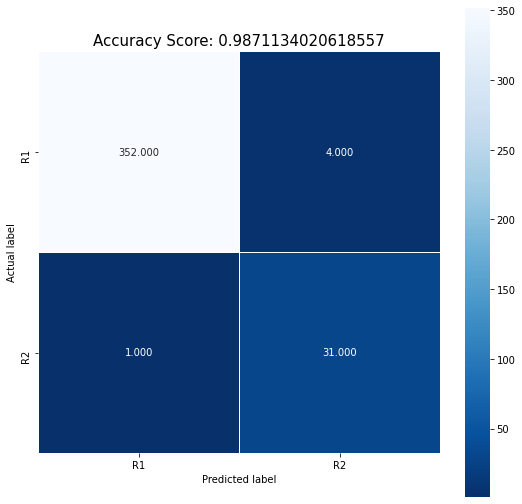

In [24]:
y_model5_1 = search_knn.predict(X_data_R1R2_V)
ass5_1=accuracy_score(Y_data_R1R2_V, y_model5_1)
print(accuracy_score(Y_data_R1R2_V, y_model5_1))

##confusion_matrix

from sklearn import metrics
cm5_1 = metrics.confusion_matrix(Y_data_R1R2_V, y_model5_1)
# print(cm)
class_names = ['R1', 'R2']
fig, ax = plt.subplots(figsize=(9,9))

ax = sns.heatmap(cm5_1, annot=True, 
                 fmt=".3f", 
                 linewidths=.5, 
                 square = True, 
                 cmap = 'Blues_r',
                 xticklabels=class_names, 
                 yticklabels=class_names);

ax.set_ylabel('Actual label');
ax.set_xlabel('Predicted label');
all_sample_title = f'Accuracy Score: {ass5_1}'
ax.set_title(all_sample_title, size = 15);
plt.show()

            Algorithm  Accuracy from default setting  Accuracy from Gridsearch
0                 SVM                       0.994845                  0.994845
1             XGBOOST                       1.000000                  1.000000
2         Radomforest                       1.000000                  1.000000
3  LogisticRegression                       0.917526                  0.997423
4                 KNN                       0.989691                  0.989691


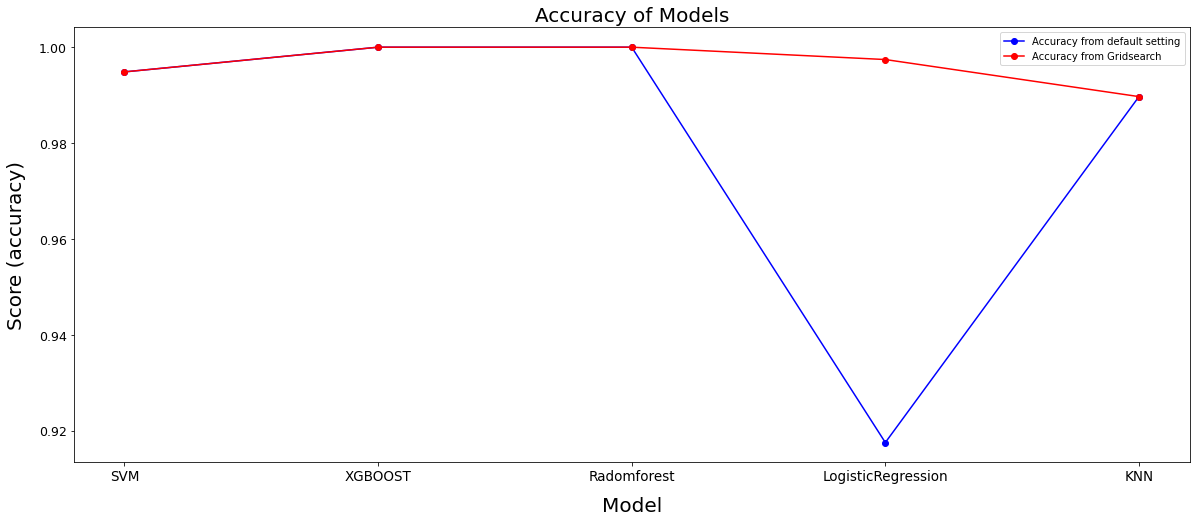

In [67]:
# Plot the predictions for each model

comparison={"Algorithm":['SVM','XGBOOST','Radomforest','LogisticRegression','KNN'], "Accuracy from default setting":[ass,ass2,ass3,ass4,ass5], "Accuracy from Gridsearch":[ass,ass2,ass3,ass4_1,ass5]}
dfcomparison=pd.DataFrame(data=comparison)
print(dfcomparison)

f, ax = plt.subplots(figsize=(20, 8))
x_col='Algorithm'
y_col = 'Accuracy'

ax.plot_date(dfcomparison["Algorithm"], dfcomparison["Accuracy from default setting"], color="blue", label="Accuracy from default setting", linestyle="-")
ax.plot_date(dfcomparison["Algorithm"], dfcomparison["Accuracy from Gridsearch"], color="red", label="Accuracy from Gridsearch", linestyle="-")
plt.ylabel('Score (accuracy)', size=20, labelpad=12.5)
plt.xlabel('Model', size=20, labelpad=12.5)
plt.tick_params(axis='x', labelsize=13.5)
plt.tick_params(axis='y', labelsize=12.5)

plt.title('Accuracy of Models', size=20)

ax.legend()

plt.show()

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


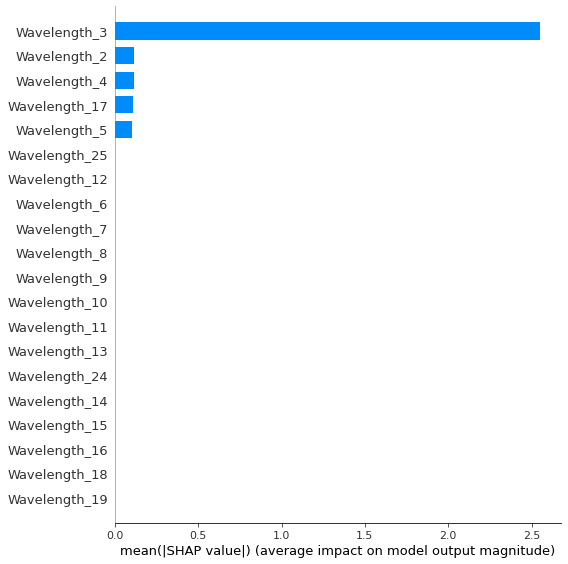

In [69]:
import shap
shap.initjs()

explainer = shap.TreeExplainer(model2)

shap_values_test = explainer.shap_values(X_data_R1R2_V)
shap.summary_plot(shap_values_test, X_data_R1R2_V.values, plot_type="bar", class_names= class_names, feature_names = X_data_R1R2_V.columns)

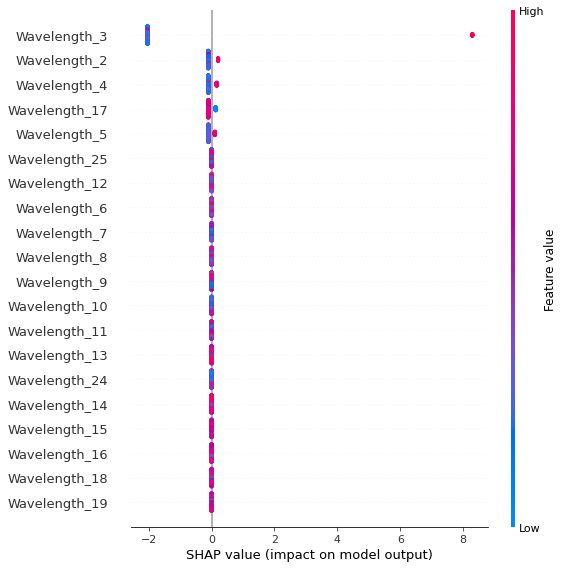

In [70]:
#You can also see the summary_plot of a specific class. R1
shap.summary_plot(shap_values_test, X_data_R1R2_V.values, feature_names = X_data_R1R2_V.columns)

In [71]:
#####print prdict answer
model2.predict(X_data_R1R2_V.iloc[[2]])

array(['Cowley_R1'], dtype=object)

In [73]:
###R1
i=2
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[i], X_data_R1R2_V.values[i], feature_names = X_data_R1R2_V.columns)

In [74]:
#####print prdict answer
model2.predict(X_data_R1R2_V.iloc[[4]])

array(['Cowley_R1'], dtype=object)

In [75]:
###R1
i=4
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[i], X_data_R1R2_V.values[i], feature_names = X_data_R1R2_V.columns)

In [23]:
#####print prdict answer
model2.predict(X_data_R1R2_V.iloc[[7]])

array(['Cowley_R1'], dtype=object)

In [76]:
###R1
i=7
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[i], X_data_R1R2_V.values[i], feature_names = X_data_R1R2_V.columns)

In [88]:
#####print prdict answer
model2.predict(X_data_R1R2_V.iloc[[375]])

array(['Cowley_R2'], dtype=object)

In [89]:
###R2
i=375
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[i], X_data_R1R2_V.values[i], feature_names = X_data_R1R2_V.columns)

In [ ]:
param_grid_LR = {"penalty" : ['l1', 'l2'],          # l1 lasso l2 ridge
"C" : [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000],
"solver" : ['liblinear', 'saga']}



search_LR = GridSearchCV(model4, 
                      param_grid = param_grid_LR,
                      cv = 5,
                      scoring = 'accuracy',##it's an indicator to evaluate the parameters##越大越好
                      n_jobs= 8,
                      )

search_LR.fit(X_data_R1R2_T, Y_data_R1R2_T)

print(f'最好的參數 {search_LR.best_params_}')####最好的參數
print(f'GridSearchCV 的 accuracy {search_LR.best_score_}')####最好的accuracy

最好的參數 {'C': 1000, 'penalty': 'l1', 'solver': 'liblinear'}
GridSearchCV 的 accuracy 0.984251968503937


In [28]:
#####print prdict answer
model2.predict(Xtest.iloc[[385]])

array(['Cowley_R2'], dtype=object)

In [86]:
###R2
i=385
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[i], X_data_R1R2_V.values[i], feature_names = X_data_R1R2_V.columns)

In [30]:
#####print prdict answer
model2.predict(Xtest.iloc[[387]])

array(['Cowley_R2'], dtype=object)

In [87]:
###R2
i=387
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values_test[i], X_data_R1R2_V.values[i], feature_names = X_data_R1R2_V.columns)

In [90]:
shap.force_plot(explainer.expected_value, shap_values_test, X_data_R1R2_V)